# Prepare Dataset for Model Training and Evaluating

# ADA monthly data with age and gender labels


## Schema

- `marketplace`: 2-letter country code (in this case all "US").
- `customer_id`: Random identifier that can be used to aggregate reviews written by a single author.
- `review_id`: A unique ID for the review.
- `product_id`: The Amazon Standard Identification Number (ASIN).  `http://www.amazon.com/dp/<ASIN>` links to the product's detail page.
- `product_parent`: The parent of that ASIN.  Multiple ASINs (color or format variations of the same product) can roll up into a single parent.
- `product_title`: Title description of the product.
- `product_category`: Broad product category that can be used to group reviews (in this case digital videos).
- `star_rating`: The review's rating (1 to 5 stars).
- `helpful_votes`: Number of helpful votes for the review.
- `total_votes`: Number of total votes the review received.
- `vine`: Was the review written as part of the [Vine](https://www.amazon.com/gp/vine/help) program?
- `verified_purchase`: Was the review from a verified purchase?
- `review_headline`: The title of the review itself.
- `review_body`: The text of the review.
- `review_date`: The date the review was written.

# Checking Pre-Requisites from the Previous `01_setup/` Folder

In [1]:
%store -r setup_instance_check_passed

In [2]:
try:
    setup_instance_check_passed
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.')
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_instance_check_passed)

In [ ]:
%store -r setup_dependencies_passed

In [ ]:
try:
    setup_dependencies_passed
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.')
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_dependencies_passed)

In [ ]:
%store -r setup_s3_bucket_passed

In [ ]:
try:
    setup_s3_bucket_passed    
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.')
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_s3_bucket_passed)

In [3]:
%store -r setup_iam_roles_passed

no stored variable or alias setup_iam_roles_passed


In [ ]:
try:
    setup_iam_roles_passed  
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.') 
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_iam_roles_passed)

## Check if requirements passed

In [ ]:
if not setup_instance_check_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_dependencies_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_s3_bucket_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_iam_roles_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.') 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

In [1]:
import boto3
import sagemaker
import pandas as pd

sess   = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

## Download

Let's start by retrieving a subset of the dataset.

In [4]:
input_data_path = "s3://ada-dev/etl/ml/gender/temp/train/MY/202003/part-00000-d16978a0-ff32-4b59-bdc5-875fe7dadda0-c000.snappy.parquet"

In [6]:
!aws s3 cp $input_data_path ./data/test_data.parquet

download: s3://ada-dev/etl/ml/gender/temp/train/MY/202003/part-00000-d16978a0-ff32-4b59-bdc5-875fe7dadda0-c000.snappy.parquet to data/test_data.parquet


In [9]:
!pip install pyarrow

     |████████████████████████████████| 17.7 MB 30.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [10]:
import csv
import pyarrow

df = pd.read_parquet('./data/test_data.parquet')
df.shape

(696, 16)

In [13]:
df.dtypes

ifa                            object
label                           int32
bundle_vec                     object
persona_segment_vec            object
persona_L1_vec                 object
persona_L2_vec                 object
persona_L3_vec                 object
device_vendor_vec              object
device_name_vec                object
device_manufacturer_vec        object
device_model_vec               object
device_year_of_release_vec     object
dev_platform_vec               object
major_os_vec                   object
features                       object
classWeightCol                float64
dtype: object

In [11]:
df.head(5)

,ifa,label,bundle_vec,persona_segment_vec,persona_L1_vec,persona_L2_vec,persona_L3_vec,device_vendor_vec,device_name_vec,device_manufacturer_vec,device_model_vec,device_year_of_release_vec,dev_platform_vec,major_os_vec,features,classWeightCol
0,001734f0-5c32-46e9-b0df-8042773b5d9c,1,"{'type': 0, 'size': 8062, 'indices': [2, 5, 20...","{'type': 0, 'size': 57, 'indices': [0, 2, 3, 9...","{'type': 0, 'size': 19, 'indices': [0, 2, 6], ...","{'type': 0, 'size': 85, 'indices': [0, 1, 4, 6...","{'type': 0, 'size': 60, 'indices': [2, 7], 'va...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 256, 'indices': [0], 'valu...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 487, 'indices': [69], 'val...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 9082, 'indices': [2, 5, 20...",0.202311
1,00ee6602-3b91-4008-815e-ccd6fd2373bb,1,"{'type': 0, 'size': 8062, 'indices': [5, 8, 21...","{'type': 0, 'size': 57, 'indices': [0, 3, 4, 6...","{'type': 0, 'size': 19, 'indices': [0, 3, 6, 1...","{'type': 0, 'size': 85, 'indices': [1, 3, 5, 6...","{'type': 0, 'size': 60, 'indices': [1, 2, 3, 3...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 256, 'indices': [0], 'valu...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 487, 'indices': [4], 'valu...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 9082, 'indices': [5, 8, 21...",0.202311
2,0167758c-16e6-49f3-a076-9302395e9265,1,"{'type': 0, 'size': 8062, 'indices': [0, 19, 2...","{'type': 0, 'size': 57, 'indices': [1, 9, 11, ...","{'type': 0, 'size': 19, 'indices': [0, 1, 5], ...","{'type': 0, 'size': 85, 'indices': [1, 2, 16, ...","{'type': 0, 'size': 60, 'indices': [0, 7], 'va...","{'type': 0, 'size': 20, 'indices': [2], 'value...","{'type': 0, 'size': 256, 'indices': [105], 'va...","{'type': 0, 'size': 20, 'indices': [2], 'value...","{'type': 0, 'size': 487, 'indices': [202], 'va...","{'type': 0, 'size': 7, 'indices': [2], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 9082, 'indices': [0, 19, 2...",0.202311
3,01c9cafc-77f7-479f-b15f-9e9d960cf7af,1,"{'type': 0, 'size': 8062, 'indices': [1, 4, 15...","{'type': 0, 'size': 57, 'indices': [0, 3, 5, 6...","{'type': 0, 'size': 19, 'indices': [0, 4], 'va...","{'type': 0, 'size': 85, 'indices': [0, 1, 7], ...","{'type': 0, 'size': 60, 'indices': [7], 'value...","{'type': 0, 'size': 20, 'indices': [], 'values...","{'type': 0, 'size': 256, 'indices': [], 'value...","{'type': 0, 'size': 20, 'indices': [], 'values...","{'type': 0, 'size': 487, 'indices': [20], 'val...","{'type': 0, 'size': 7, 'indices': [], 'values'...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 9082, 'indices': [1, 4, 15...",0.202311
4,02095470-5ec2-4d03-abc7-85d69f2afc5d,1,"{'type': 0, 'size': 8062, 'indices': [1, 5, 7,...","{'type': 0, 'size': 57, 'indices': [0, 3, 14, ...","{'type': 0, 'size': 19, 'indices': [0, 6], 'va...","{'type': 0, 'size': 85, 'indices': [0, 6, 23],...","{'type': 0, 'size': 60, 'indices': [2, 24], 'v...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 256, 'indices': [0], 'valu...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 487, 'indices': [232], 'va...","{'type': 0, 'size': 7, 'indices': [4], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [3], 'values...","{'type': 0, 'size': 9082, 'indices': [1, 5, 7,...",0.202311


Text(0, 0.5, 'Count')

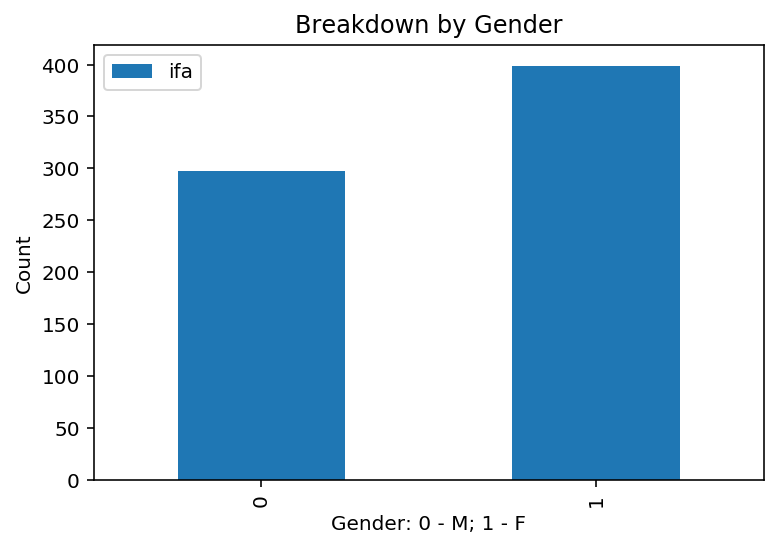

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

df[['ifa', 'label']].groupby('label').count().plot(kind='bar', title='Breakdown by Gender')
plt.xlabel('Gender: 0 - M; 1 - F')
plt.ylabel('Count')

# Balance the Dataset

In [15]:
from sklearn.utils import resample

male_df = df.query('label == 0')
female_df = df.query('label == 1')

In [19]:
# Check which sentiment has the least number of samples
minority_count = min(male_df.shape[0], 
                     female_df.shape[0]) 

male_df = resample(male_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

female_df = resample(female_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)


df_balanced = pd.concat([male_df, female_df])
df_balanced = df_balanced.reset_index(drop=True)

df_balanced.shape

(594, 16)

Text(0, 0.5, 'Count')

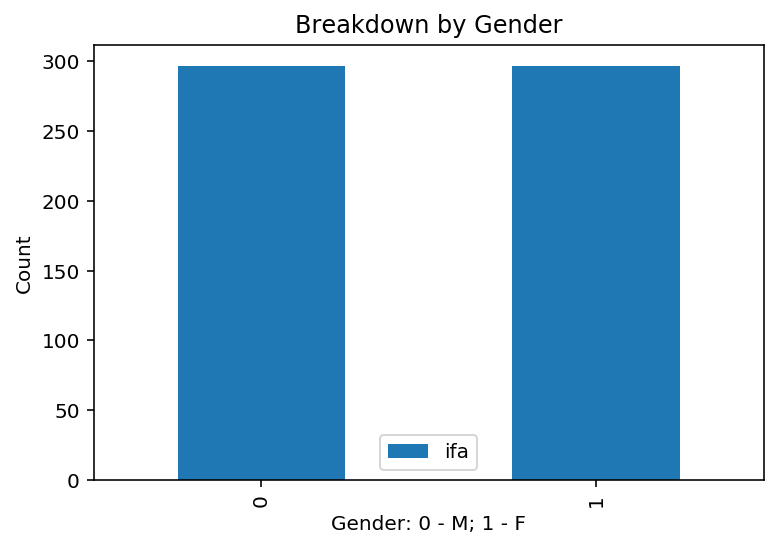

In [21]:
df_balanced[['ifa', 'label']].groupby('label').count().plot(kind='bar', title='Breakdown by Gender')
plt.xlabel('Gender: 0 - M; 1 - F')
plt.ylabel('Count')

In [22]:
df_balanced.head(5)

,ifa,label,bundle_vec,persona_segment_vec,persona_L1_vec,persona_L2_vec,persona_L3_vec,device_vendor_vec,device_name_vec,device_manufacturer_vec,device_model_vec,device_year_of_release_vec,dev_platform_vec,major_os_vec,features,classWeightCol
0,f45481af-a951-4c2c-aa8a-94cbf62f6b8c,0,"{'type': 0, 'size': 8062, 'indices': [2, 4, 6,...","{'type': 0, 'size': 57, 'indices': [0, 4, 5, 7...","{'type': 0, 'size': 19, 'indices': [3], 'value...","{'type': 0, 'size': 85, 'indices': [3], 'value...","{'type': 0, 'size': 60, 'indices': [], 'values...","{'type': 0, 'size': 20, 'indices': [4], 'value...","{'type': 0, 'size': 256, 'indices': [70], 'val...","{'type': 0, 'size': 20, 'indices': [4], 'value...","{'type': 0, 'size': 487, 'indices': [114], 'va...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 9082, 'indices': [2, 4, 6,...",0.298944
1,0b3b1a23-81b7-4083-aa2f-df60cb0cf940,0,"{'type': 0, 'size': 8062, 'indices': [0, 31, 4...","{'type': 0, 'size': 57, 'indices': [1, 2, 7, 1...","{'type': 0, 'size': 19, 'indices': [1, 2], 'va...","{'type': 0, 'size': 85, 'indices': [2, 4], 'va...","{'type': 0, 'size': 60, 'indices': [0], 'value...","{'type': 0, 'size': 20, 'indices': [4], 'value...","{'type': 0, 'size': 256, 'indices': [46], 'val...","{'type': 0, 'size': 20, 'indices': [4], 'value...","{'type': 0, 'size': 487, 'indices': [65], 'val...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 9082, 'indices': [0, 31, 4...",0.298944
2,ff17f126-620d-4e03-9935-17d8672509b4,0,"{'type': 0, 'size': 8062, 'indices': [2, 4, 7,...","{'type': 0, 'size': 57, 'indices': [0, 1, 2, 3...","{'type': 0, 'size': 19, 'indices': [0, 2, 4, 5...","{'type': 0, 'size': 85, 'indices': [0, 1, 5, 7...","{'type': 0, 'size': 60, 'indices': [1, 3], 'va...","{'type': 0, 'size': 20, 'indices': [2], 'value...","{'type': 0, 'size': 256, 'indices': [17], 'val...","{'type': 0, 'size': 20, 'indices': [2], 'value...","{'type': 0, 'size': 487, 'indices': [31], 'val...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [2], 'values...","{'type': 0, 'size': 9082, 'indices': [2, 4, 7,...",0.298944
3,06a6847a-0a8d-4b5f-97da-c7a4149d734e,0,"{'type': 0, 'size': 8062, 'indices': [1, 24, 1...","{'type': 0, 'size': 57, 'indices': [3, 9, 19, ...","{'type': 0, 'size': 19, 'indices': [0, 4, 7], ...","{'type': 0, 'size': 85, 'indices': [0, 7, 15],...","{'type': 0, 'size': 60, 'indices': [6], 'value...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 256, 'indices': [0], 'valu...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 487, 'indices': [19], 'val...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 9082, 'indices': [1, 24, 1...",0.298944
4,d9fe2843-e3d8-4ee6-96e6-3ad9dcfe5fc1,0,"{'type': 0, 'size': 8062, 'indices': [10, 13, ...","{'type': 0, 'size': 57, 'indices': [0, 2, 3, 5...","{'type': 0, 'size': 19, 'indices': [0, 2], 'va...","{'type': 0, 'size': 85, 'indices': [4, 5], 'va...","{'type': 0, 'size': 60, 'indices': [3], 'value...","{'type': 0, 'size': 20, 'indices': [], 'values...","{'type': 0, 'size': 256, 'indices': [], 'value...","{'type': 0, 'size': 20, 'indices': [], 'values...","{'type': 0, 'size': 487, 'indices': [20], 'val...","{'type': 0, 'size': 7, 'indices': [], 'values'...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 9082, 'indices': [10, 13, ...",0.298944


# Split the Data into Train, Validation, and Test Sets

In [50]:
from sklearn.model_selection import train_test_split

# Split all data into 90% train and 10% holdout
df_train, df_holdout = train_test_split(df_balanced, 
                                        test_size=0.10,
                                        stratify=df_balanced['label'])

# Split holdout data into 50% validation and 50% test
df_validation, df_test = train_test_split(df_holdout,
                                          test_size=0.50, 
                                          stratify=df_holdout['label'])


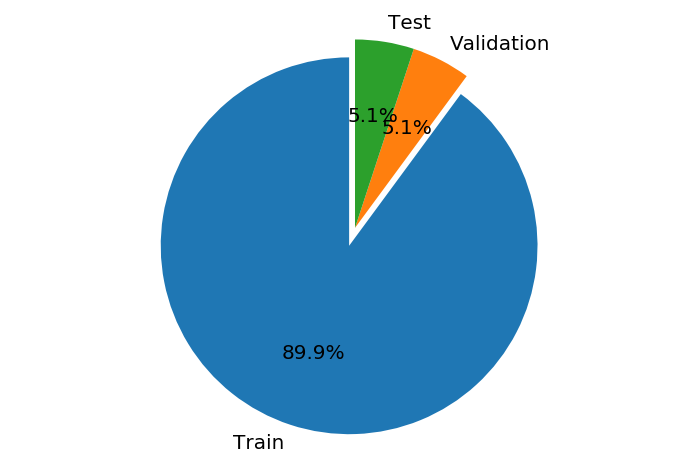

In [29]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Train', 'Validation', 'Test']
sizes = [len(df_train.index), len(df_validation.index), len(df_test.index)]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.show()

# Show 90% Train Data Split

In [51]:
df_train.shape

(534, 16)

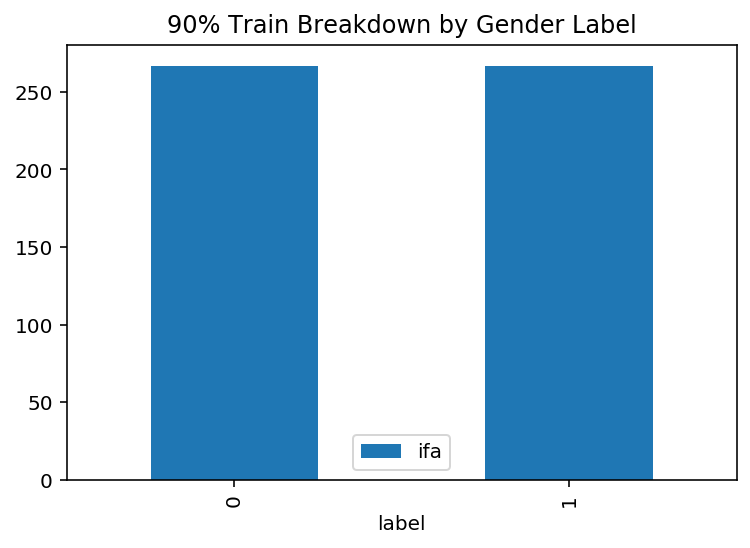

In [31]:
df_train[['ifa', 'label']].groupby('label').count().plot(kind='bar', title='90% Train Breakdown by Gender Label')

# Show 5% Validation Data Split

In [32]:
df_validation.shape

(30, 16)

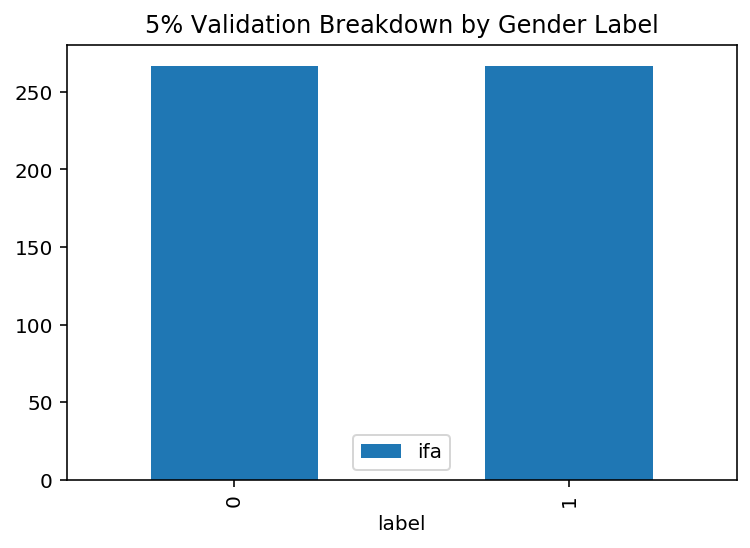

In [34]:
df_train[['ifa', 'label']].groupby('label').count().plot(kind='bar', title='5% Validation Breakdown by Gender Label')

# Show 5% Test Data Split

In [35]:
df_test.shape

(30, 16)

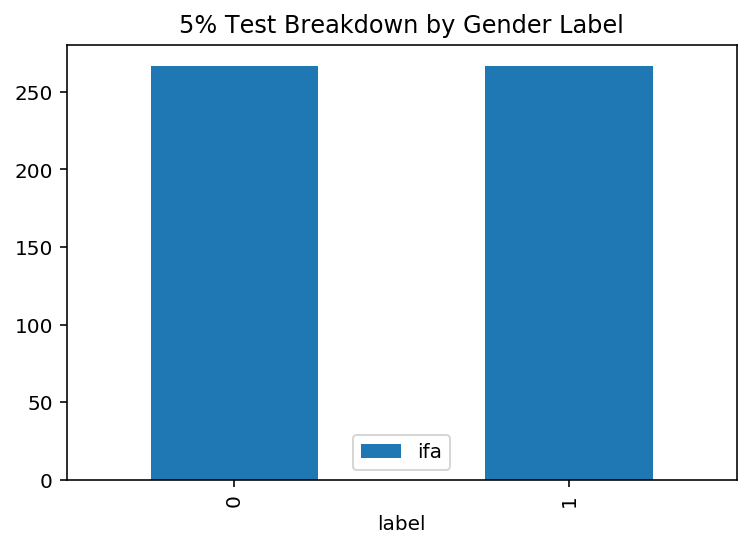

In [36]:
df_train[['ifa', 'label']].groupby('label').count().plot(kind='bar', title='5% Test Breakdown by Gender Label')

# Select `label` and `features` for Training

In [52]:
df_train = df_train.drop(['classWeightCol','features'],axis = 1)
df_train.shape

(534, 14)

In [53]:
df_train.head(5)

,ifa,label,bundle_vec,persona_segment_vec,persona_L1_vec,persona_L2_vec,persona_L3_vec,device_vendor_vec,device_name_vec,device_manufacturer_vec,device_model_vec,device_year_of_release_vec,dev_platform_vec,major_os_vec
433,2b93850e-7541-4c62-a72e-2d8dc3237f7b,1,"{'type': 0, 'size': 8062, 'indices': [0, 1, 35...","{'type': 0, 'size': 57, 'indices': [1, 2, 3, 5...","{'type': 0, 'size': 19, 'indices': [0, 1, 2], ...","{'type': 0, 'size': 85, 'indices': [0, 1, 2, 1...","{'type': 0, 'size': 60, 'indices': [0, 1], 'va...","{'type': 0, 'size': 20, 'indices': [0], 'value...","{'type': 0, 'size': 256, 'indices': [8], 'valu...","{'type': 0, 'size': 20, 'indices': [0], 'value...","{'type': 0, 'size': 487, 'indices': [8], 'valu...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values..."
77,98980d85-2ab8-4174-830d-bf153e924cb6,0,"{'type': 0, 'size': 8062, 'indices': [2, 7, 19...","{'type': 0, 'size': 57, 'indices': [0, 12, 15,...","{'type': 0, 'size': 19, 'indices': [0, 5], 'va...","{'type': 0, 'size': 85, 'indices': [0, 19], 'v...","{'type': 0, 'size': 60, 'indices': [], 'values...","{'type': 0, 'size': 20, 'indices': [3], 'value...","{'type': 0, 'size': 256, 'indices': [162], 'va...","{'type': 0, 'size': 20, 'indices': [3], 'value...","{'type': 0, 'size': 487, 'indices': [328], 'va...","{'type': 0, 'size': 7, 'indices': [4], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [5], 'values..."
207,c5f1edc8-4450-47de-96cc-e916c6537b04,0,"{'type': 0, 'size': 8062, 'indices': [0, 18, 6...","{'type': 0, 'size': 57, 'indices': [1, 3, 16, ...","{'type': 0, 'size': 19, 'indices': [0, 1, 5, 7...","{'type': 0, 'size': 85, 'indices': [0, 2, 8, 9...","{'type': 0, 'size': 60, 'indices': [0, 5, 6], ...","{'type': 0, 'size': 20, 'indices': [], 'values...","{'type': 0, 'size': 256, 'indices': [], 'value...","{'type': 0, 'size': 20, 'indices': [], 'values...","{'type': 0, 'size': 487, 'indices': [196], 'va...","{'type': 0, 'size': 7, 'indices': [], 'values'...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [2], 'values..."
130,43d07c1d-56fa-4f79-82a6-b4ba9630bda7,0,"{'type': 0, 'size': 8062, 'indices': [17, 91, ...","{'type': 0, 'size': 57, 'indices': [0, 8, 16, ...","{'type': 0, 'size': 19, 'indices': [0, 8, 9, 1...","{'type': 0, 'size': 85, 'indices': [5, 8, 9, 2...","{'type': 0, 'size': 60, 'indices': [5, 12], 'v...","{'type': 0, 'size': 20, 'indices': [], 'values...","{'type': 0, 'size': 256, 'indices': [], 'value...","{'type': 0, 'size': 20, 'indices': [], 'values...","{'type': 0, 'size': 487, 'indices': [234], 'va...","{'type': 0, 'size': 7, 'indices': [], 'values'...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [2], 'values..."
344,674e5aa3-c40a-4df0-baa1-a136503cf390,1,"{'type': 0, 'size': 8062, 'indices': [15, 27, ...","{'type': 0, 'size': 57, 'indices': [8, 11, 17,...","{'type': 0, 'size': 19, 'indices': [4], 'value...","{'type': 0, 'size': 85, 'indices': [7], 'value...","{'type': 0, 'size': 60, 'indices': [], 'values...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 256, 'indices': [0], 'valu...","{'type': 0, 'size': 20, 'indices': [1], 'value...","{'type': 0, 'size': 487, 'indices': [83], 'val...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values..."


# Write a Train CSV with Header for Autopilot 

In [54]:
autopilot_train_path = './train_data.csv'
df_train.to_csv(autopilot_train_path, index=False, header=True)

# Upload Train Data to S3 for Autopilot

In [55]:
train_s3_prefix = 'xiaotian/ml/autopilot/data'
bucket = "ada-dev"
autopilot_train_s3_uri = sess.upload_data(path=autopilot_train_path,bucket = bucket, key_prefix=train_s3_prefix)
autopilot_train_s3_uri

's3://ada-dev/xiaotian/ml/autopilot/data/train_data.csv'

In [56]:
!aws s3 ls $autopilot_train_s3_uri

2020-11-13 09:17:30     661027 train_data.csv


# Store Variables for Next Notebook(s)

In [44]:
autopilot_train_s3_uri

's3://ada-dev/xiaotian/ml/autopilot/data/train_data.csv'

In [45]:
%store autopilot_train_s3_uri

Stored 'autopilot_train_s3_uri' (str)


In [46]:
%store

Stored variables and their in-db values:
autopilot_train_s3_uri             -> 's3://ada-dev/xiaotian/ml/autopilot/data/train_dat


In [ ]:
%%javascript
Jupyter.notebook.save_checkpoint();
Jupyter.notebook.session.delete();